<a href="https://colab.research.google.com/github/codestates/ds-section1-sprint2-new/blob/main/n124-AB-test/n124-AB%20Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 4*

---

# AB 테스트

## 🏆 학습 목표 
- AB 테스트가 무엇인지 설명할 수 있다.
- 주어진 데이터를 가지고 직접 AB 테스트를 진행할 수 있다.
- AB 테스트를 진행할 때, 주의해야 할 사항들에 대해 설명할 수 있다.

---

이 노트는 아래의 구성으로 이뤄져 있습니다.
- **Part 0. 도입**  
  0-1. 기획 배경  
  0-2. Data Description  

- **Part 1. AB 테스트란**   

- **Part 2. 데이터 파악**  
  2-1. 샘플 사이즈 확인 <br>
  2-2. 순 방문자수 확인  <br>
  2-3. AB 테스트 진행 기간  <br>
  2-4. 샘플에서의 전환율 확인 <br>
  2-5. 대조군과 실험군의 명수 비교

- **Part 3. AB 테스트 진행** <br>
  3-1. 귀무가설 확인 <br>
  3-2. Binomial distribution 이용 <br>
  3-3. Z-test 이용

- **Part 4. 결과** 

# **Part 0. 도입**
<img width='500' src='https://i.imgur.com/ChHMR5E.png'>

## **0-1. 기획 배경**
- 여러분들은 회사에서 데이터 분석가로 일하고 있습니다. <br>
그리고 지금까지 사용해온 웹 사이트 랜딩 페이지의 구매 버튼에 변화를 시도하여 구매를 증가시키고자
합니다. <br>
하지만 이 변화가 과연 사람들의 **구매 클릭률, CTR**를 증가시킬지는 의문입니다! 
- 새롭게 도입될 랜딩 페이지가 ***더 높은 클릭률을 올리는지를 AB 테스트를 통해 알아보도록 합니다.***  


## **0-2. Data Description** 

- **유저아이디:** 유저들의 고유식별번호
- **방문시간:** 유저들이 웹 사이트에 방문한 시간
- **그룹:** 유저가 **`control`** 그룹과 **`experiment`** 그룹 중 어떤 그룹에 속해있는지 
- **랜딩페이지:** 유저가 변화를 주지 않은 웹사이트  **`old page`**를 방문했는지 새롭게 개편된 웹사이트 **`new page`**를 방문했는지
- **클릭:** 유저가 **Buy Now** 버튼을 눌러 전환이 되었는지를 의미함. 1은 구매 전환이 되었음을 의미하며 0은 구매 전환이 되지 않았음을 의미함.

# **Part 1. AB 테스트란**

<img width='500' src='https://i.imgur.com/Fa5CdDn.png'>

많은 회사들이 웹사이트 메인화면의 이미지부터 각종 메뉴의 배치, 게시물, 리스트 등 다양한 피쳐에 변화를 주어 **방문자들의 참여도**를 늘리고자 합니다. <br> 그러기에 회사들은 **AB 테스트**라는 실험을 통해 **데이터 중심의 의사 결정**을 내리도록 하며, 이는 실제 비지니스에서 가설검증이 사용되는 application입니다. 

우리는 이번 Case Study를 통해 회사의 랜딩 페이지의 **구매 버튼**에 변화를 시도하여 구매를 증가시키고자 합니다. <br> 새롭게 도입될 랜딩 페이지가 **더 높은 구매 클릭률, CTR**을 올리는지를 AB 테스트를 통해 알아보도록 합니다.

우선, AB 테스트를 진행하기 위해 방문자를 **대조군, control group**과 **실험군, experiemnt group**으로 나누어 진행합니다. 대조군에는 **`old version`**을 보여주고 실험군에는 **`new version`**을 보여줍니다. <br>
실험의 metric은 전환율 **CTR**로써 한 버전이 다른 버전보다 더 효율적인지를 판단하는 지표로 삼습니다.

<br>

우리의 AB 테스트 가설은 아래와 같습니다.
- **귀무가설**: 새로운 버전은 이전 버전과 같거나 더 안 좋다. <br>
$H_{0}: \mu_{old} >= \mu_{new}$ <br>

- **대립가설**: 새로운 버전은 이전 버전보다 더 좋다. <br> 
$H_{a}: \mu_{old} < \mu_{new}$ <br>
 
<br>

> **💡 AB 테스트 결과** <br>
만약 우리가 귀무가설을 기각하는 데 실패한다면, 우리는 기존에 사용하던 버전을 계속해서 사용해야 할 것입니다. <br> 하지만 귀무가설을 기각한다면, 우리는 새 변화를 도입할 수 있을 것입니다. 




# **Part 2. 데이터 파악**

먼저, AB 테스트를 진행하기 전에 우선적으로 데이터에서 파악해야 할 사항들이 있습니다. <br>
EDA를 진행해나가며 아래의 사항들을 확인해봅니다! 

**`2-1.`** 샘플 사이즈 확인 <br>
**`2-2.`** 순 방문자 확인 <br>
**`2-3.`** AB 테스트 진행 기간 <br>
**`2-4.`** 샘플에서의 전환율 확인 <br>
**`2-5.`** 대조군과 실험군 명수 비교 <br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-dark')

In [2]:
from google.colab import files
files.upload();

Saving ab.csv to ab.csv


In [3]:
ab_data = pd.read_csv('ab.csv')
ab_data.head()

,유저아이디,방문시간,그룹,랜딩페이지,클릭
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,experiment,new_page,0
3,853541,2017-01-08 18:28:03.143765,experiment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
# 데이터에 missing value 확인
ab_data.isnull().sum()

유저아이디    0
방문시간     0
그룹       0
랜딩페이지    0
클릭       0
dtype: int64

### **2-1. 샘플 사이즈 확인**

AB 테스트를 실시하기 위해서는 **충분한 Sample Size**, 즉 **방문자수**가 확보되어야 합니다. <br>

그 이유는 사실상 AB 테스트는 통계적 개념인 가설검정이기 때문인데요. 통계적으로 의미 있는 차이를 데이터에서 도출하기 위해서는 충분한 데이터가 뒷받침 되어야 합니다. 그리고 우리는 통계적으로 의미있는 차가 생겨야지만 결과를 신뢰할 수 있게 되므로 ***AB 테스트 진행시 방문자수는 매우 중요합니다.*** 

<br>

**그럼 AB 테스트 진행시 어느 정도의 방문자수가 필요한 것일까요?**

AB테스트 진행시 충분한 데이터의 개수는 다양한 요소에 의해서 결정되어 집니다. <br> 
그 중 Baseline Conversion Rate, Minimum Detectable Effect, Statistiical Significance를 기반으로 AB 테스트의 샘플 사이즈를 계산해주는 툴인 **[옵티마이즐리](https://www.optimizely.com/sample-size-calculator/?effect=20&significance=95)**를 통해, 테스트 시작 전 어느 정도의 데이터가 필요한지 적절한 샘플 사이즈를 파악하도록 합니다.


<img width='500' src='https://i.imgur.com/CIHJNyS.png'> 


</br>

> 💡 **Tip: MDE란 무엇일까요?**
>
>AB 테스트 진행 시, MDE(Minimum Detectable Effect)는 sample에서의 A안과 B안의 상대적인 통계량차가 유의미한 것인지를 판단하는 기준라고 할 수 있습니다.
예를 들어 A안의 전환율이 6.19%이고, B안의 전환율이 9.71% 일 때, sample에서의 effect size는 57%( $9.71 \over 6.19$ $- 1$ )이며, 이는 두 가지 안의 상대적인 통계량차를 의미합니다. </br>
> 
> 여기에서 우리는 57%가 유의미하게 큰 차이인 것인지, 아닌지를 판단해야하는데, 이 때 기준이 되는 것이 바로 MDE입니다. 만약 MDE가 35%라면, 우리는 위 결과를 통해 B안이 A안에 비해 상당히 우수한 대안임을 주장할 수 있을 것입니다.
> - [How to set MDE in AB-Test](https://towardsdatascience.com/how-to-set-the-minimum-detectable-effect-in-ab-tests-fe07f8002d6d)
- [Using MDE](https://support.optimizely.com/hc/en-us/articles/4410288881293-Use-minimum-detectable-effect-MDE-when-designing-an-experiment)

In [5]:
ab_data.shape

(294478, 5)

> **🔎 해설**  
- 위의 옵티마이즐리를 통해 Conversion Rate가 12%이고 95%의 통계적 유의미함을 확인하기 위해서 최소 2,300개의 데이터가 필요한 것을 확인했습니다. 우리의 샘플 사이즈는 294,478이므로 ***충분한 데이터 개수를 확보***하고 있음을 알 수 있습니다.  

### **2-2. 순 방문자수 확인**

**순 방문자수, unique visitor**란 해당 기간 동안 웹 사이트에 1회 이상 방문한 ***중복되지 않은 방문자***를 말하며, 순방문자 수는 고유한 ID값에 의해 구분됩니다.

AB 테스트 데이터를 분석할 때에는 중복되는 방문자를 삭제해야 정확한 결과를 도출할 수 있으니 주의해 주세요!  



In [6]:
# 전체 방문자수 확인
ab_data.유저아이디.shape[0]

294478

In [7]:
# '순' 방문자수 확인
ab_data.유저아이디.nunique()

290584

In [8]:
# 중복되는 방문자들을 확인
user_duplicates = ab_data[ab_data.duplicated(['유저아이디'])]
user_duplicates 

,유저아이디,방문시간,그룹,랜딩페이지,클릭
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0
2893,773192,2017-01-14 02:55:59.590927,experiment,new_page,0
7500,899953,2017-01-07 03:06:54.068237,control,new_page,0
8036,790934,2017-01-19 08:32:20.329057,experiment,new_page,0
10218,633793,2017-01-17 00:16:00.746561,experiment,old_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,experiment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,control,old_page,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,control,new_page,0


> **🔎 해설**  
- 데이터셋에 `3,894`명의 유저들이 중복되는 것을 확인할 수 있습니다. 아래에서 이 중복되는 방문자이 왜 발생하는지 확인해보도록 합니다.

In [9]:
ab_data[ab_data.유저아이디 == 698120]

,유저아이디,방문시간,그룹,랜딩페이지,클릭
988,698120,2017-01-22 07:09:37.540970,control,new_page,0
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0


> **🔎 해설**  
- 유저아이디 `698120`가 대조군 그룹에 소속되어 있음에도 랜딩 페이지 new page가 유저에게 노출되었음을 알 수 있습니다. <br>
- 대조군 그룹의 방문자는 old page에만 노출되어야 하고, 실험군 그룹의 방문자는 new page에만 노출되어야 합니다. 다음 사항을 따르지 않는 데이터는 정제되어야 합니다. <br>  
<img width='350' src='https://i.imgur.com/4sDWoqL.png'>

> **💡 Tip** <br>
위의 사항을 따르지 않는 데이터를 확인하는 방법 **`a.`**와 **`b.`** 두 가지 코드를 이용해서 아래에서 배워보도록 합니다! 


In [10]:
# 방문자 중 control 그룹인데 new page가 보여진 명수 확인
ab_data[(ab_data.그룹 == "control") & (ab_data.랜딩페이지 == "new_page")].shape

(1928, 5)

**`a.`** List comprehension을 이용하여 데이터의 row를 하나씩 확인하여 그룹 컬럼과 랜딩페이지 컬럼의 매칭이 제대로 되지 않는 row들은 삭제해 줍니다.


In [11]:
# 첫 번째 방법
test = ["old_page" if i == "control" else "new_page" for i in ab_data.그룹]

# control 그룹 중 new page를 본 유저와 experiemnt 그룹 중 old page를 본 유저들을 확인 
error_data = ab_data[test != ab_data["랜딩페이지"]]

ab_data.drop(error_data.index)

,유저아이디,방문시간,그룹,랜딩페이지,클릭
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,experiment,new_page,0
3,853541,2017-01-08 18:28:03.143765,experiment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


**`b.`** 데이터의 row를 하나씩 꺼내는 방법이 아닌 조건을 걸어 조건에 해당하는 row를 한꺼번에 꺼냅니다.

In [12]:
# 두 번째 방법 (더 효율적인 방법)
ab_data_clean = ab_data[(ab_data.그룹 == "experiment") == (ab_data.랜딩페이지 == "new_page")]

In [13]:
# 대조군 그룹은 old page에만, 실험군 그룹은 new page에만 노출됨을 확인
ab_data_clean[((ab_data_clean['그룹'] == 'experiment') == (ab_data_clean['랜딩페이지'] == 'new_page')) == False].shape[0]

0

> **🔎 해설**  
- 위의 전체 방문자수에서 각 그룹에 잘못 매칭되어진 데이터를 확인한뒤, **3,893개의 데이터가 제거**됐음을 확인할 수 있습니다. <br>
- 하지만 여전히 순 방문자수 **하나 더 많은 것을 확인할 수 있습니다**. 이 존재하는 하나의 중복치를 확인하면 아래와 같이 중복된 유저 한 명이 나옴을 알 수 있습니다. 이 중복된 데이터를 삭제하도록 합니다!

In [14]:
ab_data_clean[ab_data_clean.duplicated(["유저아이디"])]

,유저아이디,방문시간,그룹,랜딩페이지,클릭
2893,773192,2017-01-14 02:55:59.590927,experiment,new_page,0


In [15]:
# 중복되는 유저 제거
ab_data_clean = ab_data_clean.drop_duplicates(['유저아이디'])

In [16]:
# 제거되었는지 확인
ab_data_clean[ab_data_clean.duplicated(["유저아이디"])]

,유저아이디,방문시간,그룹,랜딩페이지,클릭


> **🔎 해설** <br>
위와 같이 AB 테스트 진행시, 전체 방문자에서 **순 방문자**만을 도출하여 분석하는 것은 AB 테스트의 정확도를 위한 중요한 단계입니다.


### **2-3. AB 테스트 진행 기간**

AB 테스트는 얼마 동안 시행했는지 중요한 테스트로 수집된 데이터의 개수에 따라 다름이 있겠지만 **30일을 넘기지 않는 것을 추천합니다**. <br> 

- 첫번째 이유는 **통계적인 측면**에 있습니다. <br>
샘플 사이즈가 늘어나면 표준오차는 줄어들기 때문에, **p-value는 자연히 감소**하게 됩니다. 그런 경우 새로운 버전이 효과가 없는 경우에도 통계적으로는 유의미하다는 결과가 나와 채택하게 되는 오류를 범하게 됩니다! 

- 두번째 이유는 **비지니스 측면**에 있습니다. <br>
AB 테스트는 검증되지 않은 새로운 소재를 트래픽으로 보내는 것이므로 비니지스 측면에서도 긴 시간의 테스트는 지양됩니다.


In [17]:
from datetime import datetime

ab_data_clean["방문시간"] = pd.to_datetime(ab_data_clean["방문시간"])

ab_data_clean.방문시간.max() - ab_data_clean.방문시간.min()

Timedelta('21 days 23:59:49.081927')

> **🔎 해설** <br>
우리의 데이터는 AB 테스트를 21동안 진행했고 이는 AB 테스트를 진행하기에 적당한 기간으로 보여집니다.

### **2-4. 샘플에서의 전환율 확인**

우선, 
AB 테스트를 통해 우리가 알고자 하는 것은 **모집단에서의 모수**입니다. <br>

하지만 이전에 우리가 가지고 있는 샘플에서 확인해야 할 사항이 있기에, 이를 변수에 저장하여 <br>
추후 모수를 확인하는 과정에서 사용하도록 합니다.
- 전체 그룹에서의 전환율을 **`ctr_pop`** 변수에 저장
- control 그룹에서의 전환율을 **`ctr_control`** 변수에 저장
- experiment 그룹에서의 전환율을 **`ctr_exp`** 변수에 저장

In [18]:
# 전체 데이터셋에서의 전환율
ctr_pop = ab_data_clean.클릭.mean()
ctr_pop

0.11959708724499628

In [19]:
# 대조군 그룹에서의 전환율
ctr_control = ab_data_clean.query('그룹 == "control"').클릭.mean()
ctr_control

0.1203863045004612

In [20]:
# 실험군 그룹에서의 전환율
ctr_exp = ab_data_clean.query('그룹 == "experiment"').클릭.mean()
ctr_exp

0.11880806551510564

In [21]:
# 두 그룹에서 전환율의 차이
ctr_diff = ctr_exp - ctr_control
ctr_diff

-0.0015782389853555567

> **🔎 해설** <br>
- 샘플에서의 대조군 그룹과 실험군 그룹의 전환율 차이는 -0.15%으로 웹 사이트에 ***아무런 변화를 주지 않은 그룹의 전환율이 좀 더 높은 것***을 알 수 있습니다. <br>
- 하지만, 이 결과는 샘플에서만의 결과이며 우리가 알고자 하는 것은 모집단에서 결과입니다. 그러므로 추후 가정검설을 통해 우리가 알고자하는 모수를 샘플에서 얻은 값을 이용해 찾아가도록 합니다. 


### **2-5. 대조군과 실험군의 명수 비교**

In [22]:
# 전체 방문자 중 새 페이지를 본 확률
round(ab_data_clean[ab_data_clean.랜딩페이지 == "new_page"].shape[0] / ab_data_clean.shape[0],2)

0.5

In [23]:
# 전체 방문자 중 이전 페이지를 본 확률
round(ab_data_clean[ab_data_clean.랜딩페이지 == "old_page"].shape[0] / ab_data_clean.shape[0],2)

0.5

> **🔎 해설** <br> 
- 새 페이지를 본 방문자와 이전 페이지를 본 방문자의 비율은 각각 50%로 일치합니다. 그러므로 실험군 그룹의 방문자의 전환율이 0.15% 정도 실험군 그룹의 방문자 전환율 보다 높은 것은 샘플 개수로부터 차이는 아님을 알 수 있습니다.
- 그럼 위의 변수들을 사용하여 아래에서 AB 테스트를 진행하도록 합니다!

# **Part 3. AB 테스트 진행**

우리는 AB 테스트를 통해 ***데이터 중심의 의사결정***을 내려보도록 합니다. 

우선, 여러분들은 데이터를 통해 ***대조군의 전환율이 실험군의 전환율 보다 조금 높다***는 것을 찾았습니다. 

하지만 여러분들이 알고자 하는 건 한정적인 개수의 샘플에서의 전환율이 아닌 전체 **모집단에서의 전환율** 일 것입니다. 

즉, 여러분들이 알고자 하는 건 바로 모수 **$\mu_{old}$** 또한 **$\mu_{new}$** 보다 높다는 것입니다. 

<br>

**가설 세우기** <br>
그러므로 우리는 아래와 같이 가설을 세워 우리가 가지고 있는 샘플 데이터로 가설 검정을 시행해보도록 합니다! <br>
$H_{0}: \mu_{old} >= \mu_{new}$ <br>
$H_{a}: \mu_{old} < \mu_{new}$ 

<br>

> **💡 Tip** <br> 
우리는 새 페이지의 전환율이 이전 페이지의 전환율보다 **Definitely Better** 해야 새 페이지를 도입한다고 가정합니다. 그리고 **Definitely Better**의 기준은 아래와 같습니다.
- 귀무가설 (이전 페이지가 새 페이지의 전환율과 같거나 크다)이 옳은데, 옳지 않다고 잘못 판단한 경우 생기는 에러가 5% 보다 작아야 우리는 새 페이지의 전환율이 이전 페이지의 전환율보다 **Definitely Better**라고 판단합니다. 






### **3-1. 귀무가설 확인**

귀무가설을 검정할 때에는 대립가설과 가장 근접한 값을 기준으로 검정을 진행하며, <br> 
이러한 맥락에서 우리는 $\mu_{old}$과 $\mu_{new}$는 같다고 가정합니다. 그리고 이는 전체의 전환률 $\mu_{pop}$를 의미하기도 합니다. 

<br>

우리가 가진 샘플에서 모집단을 simulate 하여 **통계적 유의미함**을 확인하기 위해 아래의 방법을 시행하도록 합니다. 

- **`1.`** 대조군과 실험군 그룹의 샘플 데이터 개수를 이용하여 각각의 모집단을 simulate 합니다. 
- **`2.`** 이 두 모집단에서 실제 두 샘플에서의 전환률이 어디에 위치하는지 확인합니다.
- **`3.`** 두 그룹의 전환률 차이를 simulate한 분포에서 샘플의 전환율 차이 보다 면적이 큰 부분을 확인합니다.
- **`4.`** 이때 이 면적은 **p-value**를 나타내며 이 값이 0.05보다 작으면 우리는 귀무가설을 기각하고 대립가설을 채택하도록 합니다. 




In [24]:
# 귀무가설에서 전환율의 모수 p-population
ab_data_clean.클릭.mean()

0.11959708724499628

In [25]:
# 실험군 그룹에 속한 방문자수 
n_exp = ab_data_clean.query('그룹 == "experiment"').shape[0]
n_exp

145310

In [26]:
# 대조군 그룹에 속한 방문자수 
n_control = ab_data_clean.query('그룹 == "control"').shape[0]
n_control

145274

#### **a. 대조군 그룹의 귀무가설 Simulate**

두 실험군과 대조군의 차이를 확인하기 전, <br> 
우선 대조군 그룹의 귀무가설을 simulate 해보고, 그것의 평균과 샘플의 평균값이 이 분포 어디쯤에 존재하는지 확인해보도록 합니다.  



In [56]:
import random
np.random.seed(10)

old_page_null = []

for i in range(1000):
  old_page_sim = np.random.choice([0,1], n_control, p = [1-ctr_pop, ctr_pop], replace=True)
  old_page_null.append(old_page_sim.mean())

In [57]:
old_page_null = np.array(old_page_null)

In [58]:
old_page_null_mean = old_page_null.mean()

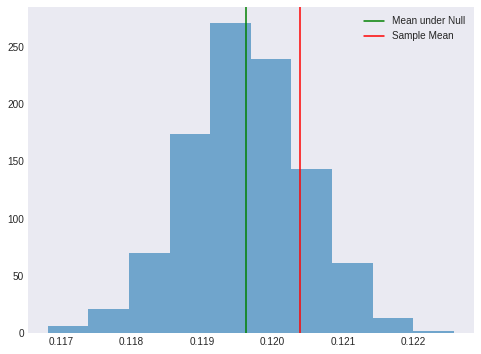

In [59]:
plt.figure(figsize=(8,6))
plt.hist(old_page_null, alpha=0.6)
plt.axvline(old_page_null_mean, color='g', label="Mean under Null")
plt.axvline(ctr_control, color='r', label='Sample Mean')
plt.legend();

#### **b. 실험군 그룹의 귀무가설 Simulate**
그 다음 실험군 그룹의 귀무가설을 simulate 해보고, 그것의 평균과 샘플의 평균값이 이 분포 어디쯤에 존재하는지 확인해보도록 합니다.  


In [60]:
np.random.seed(10)

new_page_null = []

for i in range(1000):
  new_page_sim = np.random.choice([0,1], n_exp, p = [1-ctr_pop, ctr_pop], replace=True)
  new_page_null.append(new_page_sim.mean())

In [61]:
new_page_null = np.array(new_page_null)

new_page_null_mean = new_page_null.mean()
new_page_null_mean

0.1196229853416833

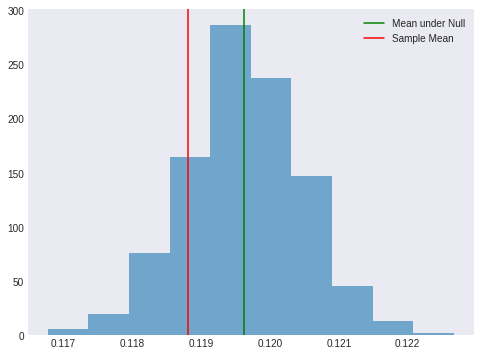

In [62]:
plt.figure(figsize=(8,6))
plt.hist(new_page_null, alpha=0.6)
plt.axvline(new_page_null_mean, color='g', label='Mean under Null')
plt.axvline(ctr_exp, color='r', label='Sample Mean')
plt.legend();

#### **c. 실험군 그룹 평균과 대조군 그룹 평균의 차이의 귀무가설 Simulate**

그럼 우리가 세운 가설을 검정해 보도록 하겠습니다. <br>
실험군 그룹과 대조군 그룹의 평균에 차이가 존재하는지 확인해보도록 합니다.

In [63]:
np.random.seed(10)

p_diffs = []

for _ in range(1000):
    new_page_converted = np.random.choice([0,1], n_exp, p = [1-ctr_pop, ctr_pop], replace=True)
    old_page_converted = np.random.choice([0,1], n_control, p = [1-ctr_pop, ctr_pop], replace=True)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [64]:
p_diffs = np.array(p_diffs)

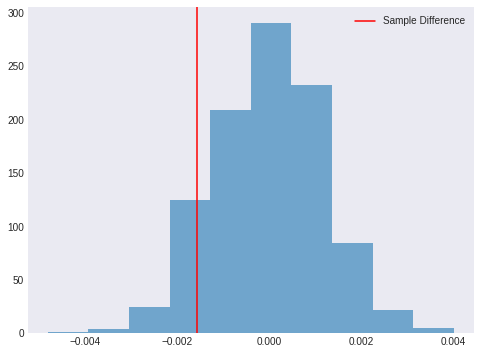

In [65]:
plt.figure(figsize=(8,6))
plt.hist(p_diffs, alpha=0.6)
plt.axvline(ctr_diff, color='r', label='Sample Difference')
plt.legend();

In [66]:
(p_diffs > ctr_diff).mean()

0.904

> **🔎 해설** <br>
- 우리가 찾은 **p-value**는 0.904로 우리의 threshold인 0.05보다 더 큰 면적입니다. 그러므로 우리는 ***귀무가설을 기각할 수 없고***, 새로운 시도를 도입하지 않습니다! 

## **3-2. Binomial distribution 이용** 

위의 과정을 파이선의 numpy에 내장되어 있는 **Binomial Distribution**을 이용하여
구현해보도록 합니다. 

이 방법은 위에서 부트스래핑인 for loop구문을 사용하여 진행하는 것보다 
시간이 많이 절약되는 것을 확인할수 있습니다!

[Numpy binomial 공식문서](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)


In [77]:
np.random.seed(10)

exp_converted_sim = np.random.binomial(n_exp, ctr_pop, 10000)/n_exp
old_converted_sim = np.random.binomial(n_control, ctr_pop, 10000)/n_control

In [78]:
p_diffs = exp_converted_sim - old_converted_sim 

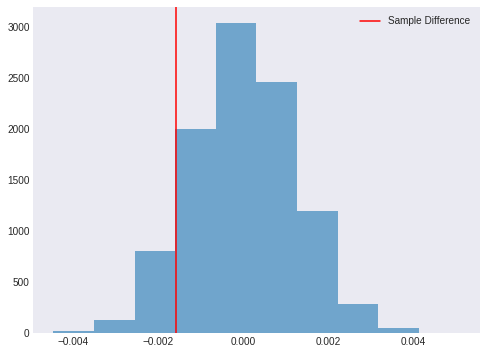

In [79]:
plt.figure(figsize=(8,6))
plt.hist(p_diffs, alpha=0.6)
plt.axvline(ctr_diff, color='r', label='Sample Difference')
plt.legend();

In [80]:
(p_diffs > ctr_diff).mean()

0.9016

## **2-3. Z-test 이용** 

위에서 Binomial distribution 메서드를 이용하여 p-value를 확인하고, 통계적 유의미함을 확인했습니다. 

이번에는 **z-test**를 이용하여, **`각 그룹의 샘플의 개수`**와 각 샘플에서 **`전환이 된 
방문자수`**를 인풋으로 넣어 **`test statistics`**와 **`p-value`**를 확인하도록 합니다.

[z-test 공식문서](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html)


In [81]:
import statsmodels.api as sm

In [82]:
old_convert = ab_data_clean.query('랜딩페이지 == "old_page"').클릭.sum()
new_convert = ab_data_clean.query('랜딩페이지 == "new_page"').클릭.sum()

In [83]:
z_score, p_value = sm.stats.proportions_ztest([old_convert, new_convert], [n_control, n_exp], alternative='smaller')

In [84]:
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


# **Part 3. 결과**

위에서 우리는 세 가지 방법으로 통계적 유의미함을 확인했고,
세 개 모두 귀무가설을 기각할 수 없음을 확인했습니다. 

그러므로 우리는 **이전에 사용하던 웹 페이지의 디자인을 그대로 사용하면 될 것입니다!**

하지만 AB테스트는 다양한 산출물을 비교 및 검증하여 최선의 디자인 안을 선택해나가는 과정이니 AB테스트는 수단이지 목적이 되어서는 안 된다는 점을 유의하시기 바랍니다! 





